# Model Deployment Netflix Project

## Data Cleaning & EDA

Group 4 :
- 2702223084 - Jonathan Christopher Gani
- 2702274495 - Kevin Gabriel Wiharja
- 2702258333 - Hartono Yaputra


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.pipeline import Pipeline
import pickle as pkl

In [2]:
dataset = pd.read_csv('netflix_titles.csv')
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Dataset Information

- show_id	= an unique identifier for every movie / TV show.
- type = an identifier between movie or TV show.
- title	= each title from the movie / TV show.
- director = the director of the movie.
- cast = the actors who is involved during the making of the movie / TV show.
- country	= the country location where the movie / TV show was created.
- date_added = the date when it was added to Netflix.
- release_year = the actual year when the movie / TV show is released.
- rating = the types of rating of the movie / TV show
- duration = the duration in minutes or number of seasons
- listed_in = the genre of the movie / TV shows
- description = the description of the movie / TV shows

In [3]:
dataset.shape

(8807, 12)

In [4]:
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB




Here, we read the Netflix dataset, which consists of 8,807 rows and 12 columns. There is also a list of the column names in the dataset, along with the brief information of data types and missing values. It can be seen that there are several missing values, specifically in the director, cast, country, date_added, rating, and duration columns. As for the data types, all of them are already appropriate.

### Converting Format Data


In [6]:
dataset['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [7]:
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce').dt.date

In [8]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



So here, we first checked the values of the date_added column, which contains date values but was detected as an object data type. Then, we converted the data format to dt.date for a better match the context and data processing needs. It can be seen that the contents of the date_added column are now in the correct year-month-day format.

### Remove Identifier Column

In [9]:
dataset.drop(columns=['show_id'], inplace=True)
dataset

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."




Since the show_id column serves as an identifier, it will not be used for modeling process later. Therefore, we decided to drop it from the beginning. Additionally, having this type of ID column can make it more difficult to detect duplicates in the data. Now we can see the total columns is 11.

### Column Values Checking and Fixing

In [10]:
for i in dataset.columns:
    print(dataset[i].value_counts(), "\n")

type
Movie      6131
TV Show    2676
Name: count, dtype: int64 

title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64 

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        

In [11]:
dataset = dataset.drop(dataset[dataset['rating'] == '74 min'].index)
dataset = dataset.drop(dataset[dataset['rating'] == '84 min'].index)
dataset = dataset.drop(dataset[dataset['rating'] == '66 min'].index)

In [12]:
dataset

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
dataset['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


Here, we first checked the contents of each column, and in the rating column, we found a value that was quite different from the others and didn't align with the description of the rating column. Therefore, we decided to drop the row containing this unusual value. It can be seen that the rows have been successfully removed.


### Remove Unused Columns


In [14]:
dataset.drop(columns=['director', 'country', 'date_added', 'duration'], inplace=True)
dataset

,type,title,cast,release_year,rating,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
8802,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Because we're gonna make a recommendation system based on content based filtering, therefore we must focusing on the movie/TV shows attributes more than the users / subject interaction attributes. So, we'll drop the attributes which less relevance with the movie/TV shows.

### Duplicated Values

In [15]:
dataset.duplicated().sum()

0

As we can see here, the dataset here is quite clean in context of duplication, because there are no duplications detected here.

### Missing Values


In [16]:
dataset.isna().sum()

type              0
title             0
cast            825
release_year      0
rating            4
listed_in         0
description       0
dtype: int64

In [17]:
dataset = dataset.dropna().reset_index(drop=True)

In [18]:
dataset.isna().sum()

type            0
title           0
cast            0
release_year    0
rating          0
listed_in       0
description     0
dtype: int64

In [19]:
dataset

,type,title,cast,release_year,rating,listed_in,description
0,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
3,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
4,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...
7970,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",2015,TV-MA,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
7971,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7972,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7973,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Here we decided to drop all the missing values because the missing values column are cast and rating, which is we cannot do the imputation because we don’t know who is the cast and what is the rating, if we do the imputation, the dataset will definitely become bias. And then we drop the missing values and resetting the index. Now we can see the dataset has no more missing values and already cleaned.

### Split Into Numerical And Categorical Data

In [20]:
num_cols = []  # making list for numerical data
cat_cols = []  # making list for categorical data

for i in dataset.columns:
    if 'int' in str(dataset[i].dtype) or 'float' in str(dataset[i].dtype):
        num_cols.append(i) # each attribute with int / float dtypes assigned to the num_cols list
    else:
        cat_cols.append(i) # the rest of non numeric attribute which is the categoricals / objects

print(f"Numerical Cols : {num_cols}")
print(f"Categorical Cols : {cat_cols}")

Numerical Cols : ['release_year']
Categorical Cols : ['type', 'title', 'cast', 'rating', 'listed_in', 'description']


In [21]:
# displaying unique values of each categorical columns
for i in cat_cols:
    print(dataset[i].value_counts(), "\n")

type
Movie      5651
TV Show    2324
Name: count, dtype: int64 

title
Blood & Water                           1
Hibana: Spark                           1
Jimmy Carr: Funny Business              1
He Never Died                           1
Kung Fu Panda: Secrets of the Scroll    1
                                       ..
Horse Girl                              1
Fifty: The Series                       1
Dragons: Rescue Riders                  1
Azali                                   1
Zubaan                                  1
Name: count, Length: 7975, dtype: int64 

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                       

So here, we’re splitting each column in the dataset into 2 lists, which is numerical and categorical types, we separate them based on their data types. And then we display each values from each categorical columns.

The frequency distribution among all the columns are quite focused on some values, for some attributes the proportion are quite evenly. Therefore the distribution were not really normally distributed.

### Exploratory Data Analysis (EDA)

Here, in content-based recommendation system, there are no explicit labels like in classification ML model. This recommendation system works with the content features. Therefore i only check the distribution and outliers only.

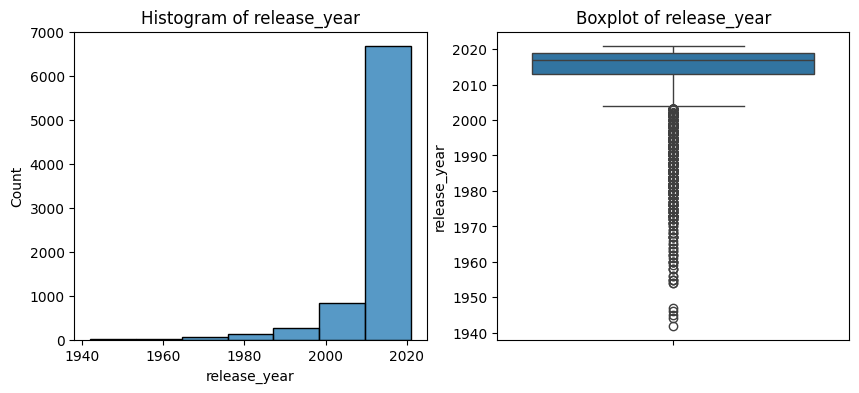

In [22]:
# check outliers and distribution for numerical columns
plt.figure(figsize=(10, 4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(dataset['release_year'], bins=7)
plt.title("Histogram of release_year")

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['release_year'])
plt.title("Boxplot of release_year")

plt.show()

Here we’re checking the outliers and distribution for the numerical column. We're not using any loop because there are only 1 numeric column. We can see from the histogram that the data distribution were not normal and it’s left skewed. Meanwhile the outlier range were quite much, spanning from 1942 to 2021. But it’s still reasonable so we won’t do anything about it. We can conclude that most of the movies / TV shows were released above 2010.



C:\Users\hartono\AppData\Local\Temp\ipykernel_19800\3747657942.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='type', palette='Set2')


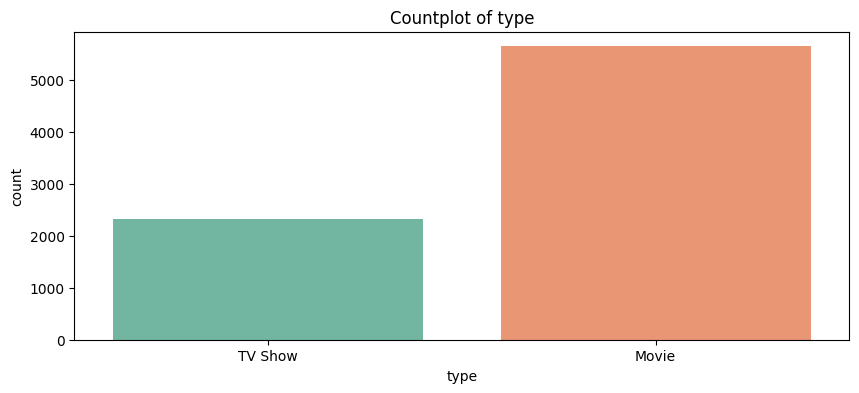

In [23]:
# checking distribution
plt.figure(figsize=(10, 4))

# countplot
plt.subplot(1, 1, 1)
sns.countplot(data=dataset, x='type', palette='Set2')
plt.title("Countplot of type")

plt.show()


C:\Users\hartono\AppData\Local\Temp\ipykernel_19800\4202810986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='rating', palette='Set2')


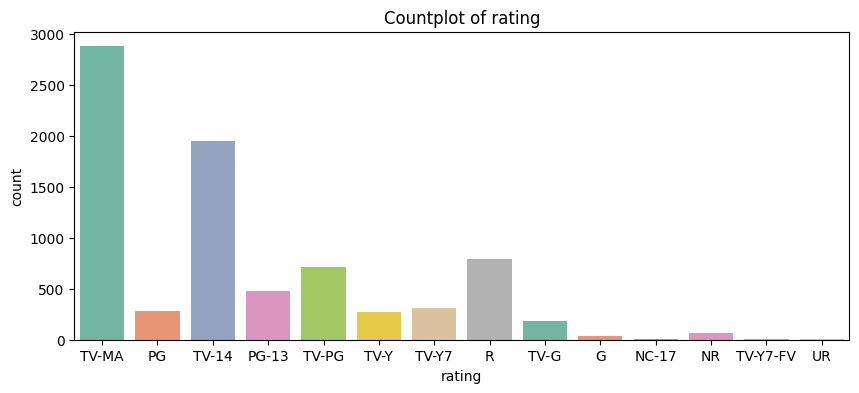

In [24]:
# checking distribution
plt.figure(figsize=(10, 4))

# countplot
plt.subplot(1, 1, 1)
sns.countplot(data=dataset, x='rating', palette='Set2')
plt.title("Countplot of rating")

plt.show()


Here, we can see that the distribution of type column were dominated by Movie with almost twice the frequency than the TV Show. Now from the rating column, we can get the information that TV-MA and TV-14 are the most type of rating in this dataset followed by the rest of the type with the frequency less than 400. We can conclude that both of the columns above were not normally distributed from the graph shown above.
I’m not checking the distribution from all the categorical columns, because the rest of them have too many values, so the graph cannot showing any useful information.


## EDA Summary

After doing the EDA so far, the dataset were not that clean in aspect of missing values, because some of them were found during the exploration process. The data distribution on categorical column were not evenly distributed, there are some values with higher frequency on each attributes. Meanwhile the numerical column were also not normally distributed. So it'll be a little challenging to make this recommendation system.

## Content-Based Recommendation System

In [25]:
dataset.head()

,type,title,cast,release_year,rating,listed_in,description
0,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
3,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
4,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [26]:
# this selected features are used to calculate the similarity between each data
dataset['selected_features'] = dataset['listed_in'] + ' ' + dataset['title'] + ' ' + dataset['rating'] + ' ' + dataset['description'] # combine into single string

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dataset['selected_features'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Here, we’re checking the first 5 entries of the data. And then we make a new column in the dataset for the selected features for recommendation process later into a single string to be analysed later.
The TfidVectorizer is used to convert the string into a numeric vector with the stop_words means to ignore the general words such as “the”, “is”, etc. And then we’re fitting the selected features. Lastly we’re counting the cosine similarity scores between all the data which shows how identical the data to each other.


In [27]:
# recommendation system function
def recommend_system(title, cosine_sim=cosine_sim, num_recommend = 5):
    indices = pd.Series(dataset.index, index=dataset['title']).drop_duplicates()  # mapping corelated values with title

    if title not in indices:
        raise ValueError(f"Title '{title}' not found in the dataset.")

    index = indices[title]  # index of the provided movie / TV shows
    sim_scores = list(enumerate(cosine_sim[index]))  # generate similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_similar = sim_scores[1:num_recommend+1]  # most similar excluding the title itself
    netflix_indices = [i[0] for i in top_similar]

    return_data = pd.DataFrame(dataset[['title', 'type', 'cast', 'rating', 'listed_in']].iloc[netflix_indices])
    return_data['score'] = np.array(top_similar)[:,1]
    return return_data

Here is the recommendation function with the title which we want to search the recommendation with cosine similarity which already counted before and number of recommend to show is 5. And then the indices is used to mapping the title to index in the dataset. The sim_scores is to generating the similarity scores and then sorted it descendingly. And then excluding the title itself and picking the index of the most similar data.   
Lastly, we make a dataframe with some attributes we want to shown in the results and an additional score column to show the similarity of the results with the inputed title.


In [28]:
filename = 'netflix_recommender.pkl'

components = {
    'tfidf': tfidf,
    'cosine_sim': cosine_sim,
    'dataset': dataset,
    'indices': pd.Series(dataset.index, index=dataset['title']).drop_duplicates()
}

pkl.dump(components, open(filename, 'wb'))

In [29]:
# input 1
input_1 = recommend_system('InuYasha the Movie 4: Fire on the Mystic Island')
input_1

,title,type,cast,rating,listed_in,score
6434,Inuyasha the Movie - L'isola del fuoco scarlatto,Movie,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",TV-PG,"Action & Adventure, Anime Features, Internatio...",0.847884
44,InuYasha the Movie 2: The Castle Beyond the Lo...,Movie,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",TV-14,"Action & Adventure, Anime Features, Internatio...",0.307229
6436,InuYasha: The Movie 2: The Castle Beyond the L...,Movie,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",TV-14,"Action & Adventure, Anime Features, Internatio...",0.307229
5160,InuYasha,TV Show,"Kappei Yamaguchi, Satsuki Yukino, Kumiko Watan...",TV-14,"Anime Series, International TV Shows",0.292884
47,InuYasha the Movie: Affections Touching Across...,Movie,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",TV-PG,"Action & Adventure, Anime Features, Internatio...",0.292410


Here, we’re testing the recommendation system with InuYasha the Movie 4: Fire on the Mystic Island. As we can see the title recommendation are quite similar, with the type, cast, rating, and listed_in are also almost identical. The score is showing how similar the recommendation with the inputed title.



In [30]:
# input 2
input_2 = recommend_system('Naruto Shippuden the Movie: Blood Prison')
input_2

,title,type,cast,rating,listed_in,score
6860,Naruto Shippuden : Blood Prison,Movie,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",TV-14,"Action & Adventure, Anime Features, Internatio...",0.987678
52,Naruto Shippuden: The Movie,Movie,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",TV-PG,"Action & Adventure, Anime Features, Internatio...",0.428897
3203,Naruto,TV Show,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",TV-14,"Anime Series, International TV Shows",0.396313
53,Naruto Shippuden: The Movie: The Lost Tower,Movie,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",TV-14,"Action & Adventure, Anime Features, Internatio...",0.363017
56,Naruto the Movie: Ninja Clash in the Land of Snow,Movie,"Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...",TV-PG,"Action & Adventure, Anime Features, Internatio...",0.353897


Here, we’re testing the second recommendation system with Naruto Shippuden the Movie: Blood Prison. As we can see the title recommendation are still quite similar, with the types, cast, rating, and listed_in are still almost identical. The score is showing how similar the recommendation with the inputed title.

In [31]:
# input 3
input_3 = recommend_system('Transformers: War for Cybertron: Kingdom')
input_3

,title,type,cast,rating,listed_in,score
1971,Transformers: War For Cybertron Trilogy,TV Show,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",TV-Y7,Anime Series,0.331748
1331,Transformers: War for Cybertron: Earthrise,TV Show,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",TV-Y7,Anime Series,0.319845
1836,Transformers: Cyberverse,TV Show,"Sophia Isabella, Jeremy Levy, Jacob Tillman, R...",TV-Y7,Kids' TV,0.207117
4199,Transformers: Rescue Bots,TV Show,"Lacey Chabert, Elan Garfias, Maurice LaMarche,...",TV-Y7,Kids' TV,0.156574
6479,Jonathan,Movie,"Ansel Elgort, Suki Waterhouse, Douglas Hodge, ...",TV-MA,"Dramas, Independent Movies, Sci-Fi & Fantasy",0.156499


Here, we’re testing the third recommendation system with Transformers: War for Cybertron: Kingdom. As we can see the title recommendation are still almost quite similar, with 1 inapropriate recommendation, from the types, cast, rating, and listed_in are not really accurate. As we can see there are some oddity especially in the listed_in column, like the transformer genre shouldn’t be anime right? So the dataset might be a little wrong or not that accurate… From the score similarity is quite average.



## Deployment Preparation

In [32]:
# sorted_dataset = dataset.sort_values(by='title')
# pipeline = Pipeline([
#         ('clean_dataset', dataset),
#         ('sorted_dataset', sorted_dataset),
#         ('selected_features', dataset['selected_features'])
#     ])
# pkl.dump(pipeline, open('datasetPipeline.pkl', 'wb'))